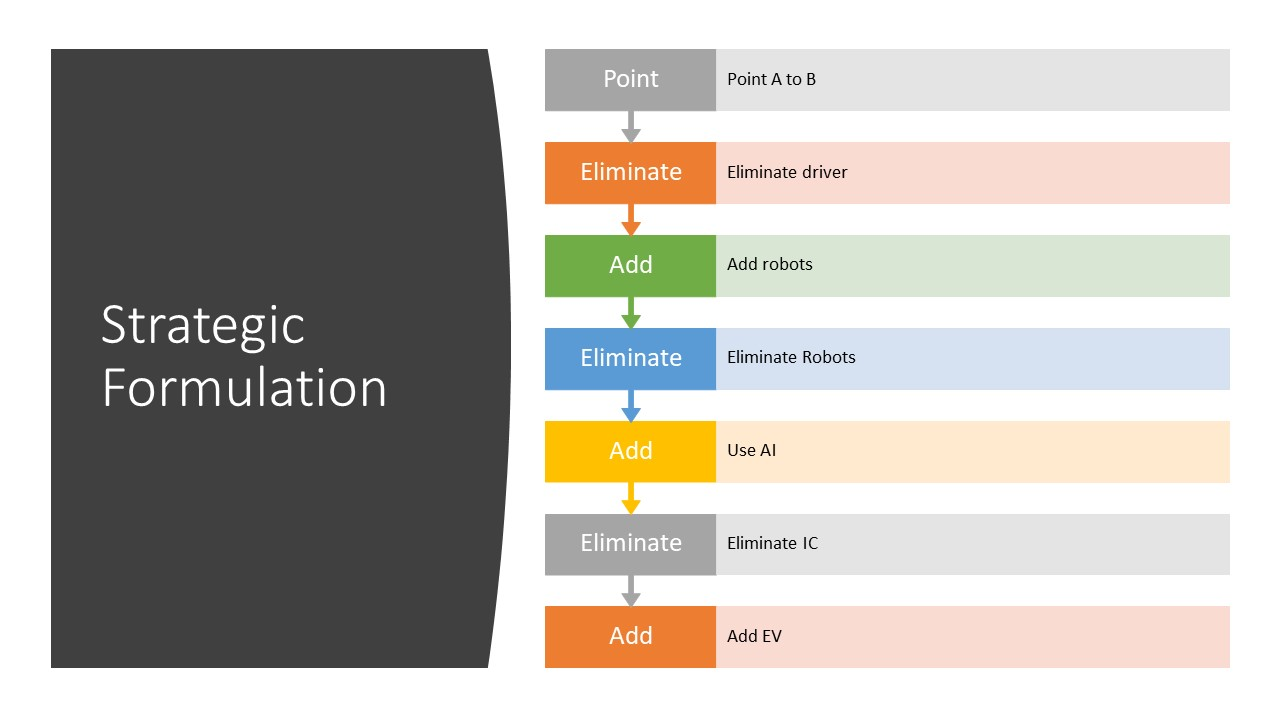

# Preface & Acknoledgement

* This project would have never beenn completed without the help from Moses Olafenwa and John Olafenwa who developed the library ImageAI which is the sole foundation of this project. 
* To be honest the model file provided by them is blackbox for us.
* We may have optimized our video for faster processing, but we have not trained this model. 

###### Models can be downlaoded from:
* https://github.com/OlafenwaMoses/ImageAI/releases/tag/1.0/

# 1. Preping project

## 1.0 Listing our directory structures

In [ ]:
! tree

## 1.1 Install Image AI

In [ ]:
!pip install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.2/imageai-2.0.2-py3-none-any.whl

## 1.2 Loading all the libraries

In [ ]:
from imageai.Detection import ObjectDetection, VideoObjectDetection
import os

# 2. Preparing video

## 2.0 Setting up video_file_name 

In [ ]:
video_file_name="jgu"

## 2.1  Reducing video resolution &

In [ ]:
def video_scaler(file_name, resolution):
        
        input_video_file_loc="./InputVideos"+"/"+file_name+".mp4"
        min_video_file_loc="./InputVideos"+"/"+file_name+"_min.mp4"
        
        cmd="ffmpeg -i "+str(input_video_file_loc)+" -vf scale="+str(resolution)+":-1 "+str(min_video_file_loc)+" -y"
        
        ! {cmd}
        
        return file_name

In [ ]:
file_name=video_scaler(video_file_name, "640")

## 2.2  Triming video

In [ ]:
def video_trimer(file_name, start_time, end_time):
        
        input_video_file_loc="./InputVideos"+"/"+file_name+"_min.mp4"
        trim_video_file_loc="./InputVideos"+"/"+file_name+"_trim.mp4"
        
        cmd="ffmpeg -ss "+str(start_time)+" -i "+str(input_video_file_loc)+" -to "+str(end_time)+" -c copy "+str(trim_video_file_loc)+" -y"
        
        ! {cmd}
        return file_name

In [ ]:
start_time="00:00:00"
end_time="00:01:24"
file_name=video_trimer(file_name,start_time, end_time)

## 2.3 Get fps of video

In [ ]:
def video_get_fps(file_name):
    import cv2
    
    trim_video_file_loc="./InputVideos"+"/"+file_name+"_trim.mp4"
    cap=cv2.VideoCapture(trim_video_file_loc)
    
    fps=cap.get(cv2.CAP_PROP_FPS)
    
    return fps

In [ ]:
fps=video_get_fps(file_name)
fps

# 3. Starting AI Modeling technique

## 3.1 Model Loader

In [ ]:
from matplotlib import pyplot as plt

def video_model_loader(model_name):
    detector= VideoObjectDetection()
#     detector.setModelTypeAsRetinaNet()
#     detector.setModelTypeAsTinyYOLOv3()
    detector.setModelTypeAsYOLOv3()
    detector.setModelPath("./Model/" +str(model_name))
    detector.loadModel()
    plt.show()
    return detector 

## 3.2 Model Rendering

In [ ]:
def video_model_renderer(file_name, detector, fps):
    
    ### Model Benchmarking
    import time
    start_time=time.time()
    #
    
    trim_video_file_loc="./InputVideos"+"/"+file_name+"_trim.mp4"
    output_video_file_loc="./OutputVideos"+"/"+file_name
    
    print("Rendring Started")
    print("------------------Please Wait------------------")
    video_path=detector.detectObjectsFromVideo(
                                        input_file_path=trim_video_file_loc,
                                        output_file_path=output_video_file_loc,
                                        frames_per_second=fps)
                                       
        
    print("------------------Rendering Done------------------")
    print("------------------Rendering Time:", (time.time()-start_time),"--------" )

In [ ]:
# detector=video_model_loader("resnet50_coco_best_v2.0.1.h5")
# detector=video_model_loader("yolo-tiny.h5")
detector=video_model_loader("yolo.h5")

In [ ]:
video_model_renderer(file_name, detector,fps)